In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

### 週販レポート
# 標準ライブラリ
import os
import sys
from pathlib import Path
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch
from gamedata import util as gu

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

show_title(report_date)

if not HTML_MODE:
    plt.show()


# 国内ゲームハード週販レポート (2025-12-21) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 一部のデータは処理上の都合により、週次値に調整しています。
* 2025年の集計期間はあと1週間分ありますが､次回の更新は年明け､2026年1月7日以降になります｡
* [過去の週販レポート](index.html)

## 直近4週間のハード売り上げ／累計推移

Switch2の販売台数は先々週の20万台を超える22万台でした｡
これはロンチ週に続くSwitch2歴代2位の販売台数です｡
任天堂の連続大量出荷は継続しています｡このまま年末年始も突き進むのでしょうか｡

Switchはやや回復して3.8万台｡先週よりマシですが先々週は5万台ですから､
世代交代による落ち込みが顕著です｡

PS5は先週とほぼ変わらずの1万9千台｡
クリスマスセール中のはずなのですが､セール効果は400台分だったようです｡

In [3]:
df1 = hs.load_hard_sales()
(out1, style1) = ch.chart_units_by_date_hw(df1, begin=gu.weeks_before(report_date, 3), end=report_date)
display(style1)

## 週販推移

/Users/hide/Documents/Development/gamedata/src/gamedata/plot_hard.py:65: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) AppleGothic.
  x_label = ""
/Users/hide/Documents/Development/gamedata/src/gamedata/plot_hard.py:65: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) AppleGothic.
  x_label = ""
/Users/hide/Documents/Development/gamedata/src/gamedata/plot_hard.py:65: UserWarning: Glyph 21336 (\N{CJK UNIFIED IDEOGRAPH-5358}) missing from font(s) AppleGothic.
  x_label = ""
/Users/hide/Documents/Development/gamedata/.venv/lib/python3.12/site-packages/IPython/core/events.py:96: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/hide/Documents/Development/gamedata/.venv/lib/python3.12/site-packages/IPython/core/events.py:96: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/hide/Docume

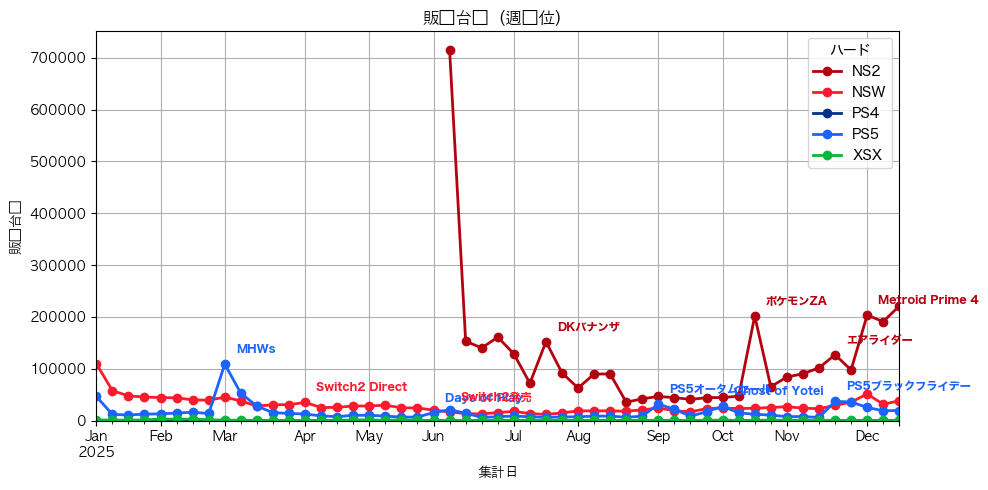

In [5]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, event_mask=report_event_mask)

### 週販推移(拡大）

Switch2の20万台超の出荷が3週間継続中です｡
これが年末年始､あと2週間継続する可能性は高そうです｡

年末年始明けでSwitchは本格的に減少するでしょう｡
今までのSwitch週販最低記録は 2025/7/25の11,766台です｡2月あたりには4桁が見えてきそうです｡

PS5は19日からのクリスマスセールの効果は出ていません｡予想通りではあります｡
今年1年間､セールを何度も何度も何度も何度も繰り返し､ついには日本語版値下げという特大技まで繰り広げましたが､
流れを変える力には足りていません｡
来年出る(はず)のGTA6までの約1年間をどうやって日本市場でPlayStationのプレゼンスを維持するのか､
難しい舵取りが続きそうです｡



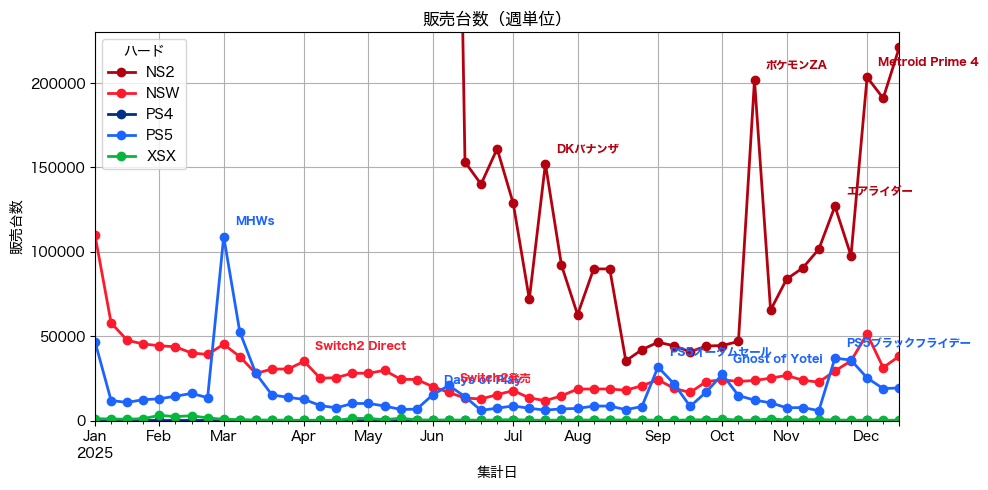

In [5]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, ymax=230000, event_mask=report_event_mask)

## 月間販売推移

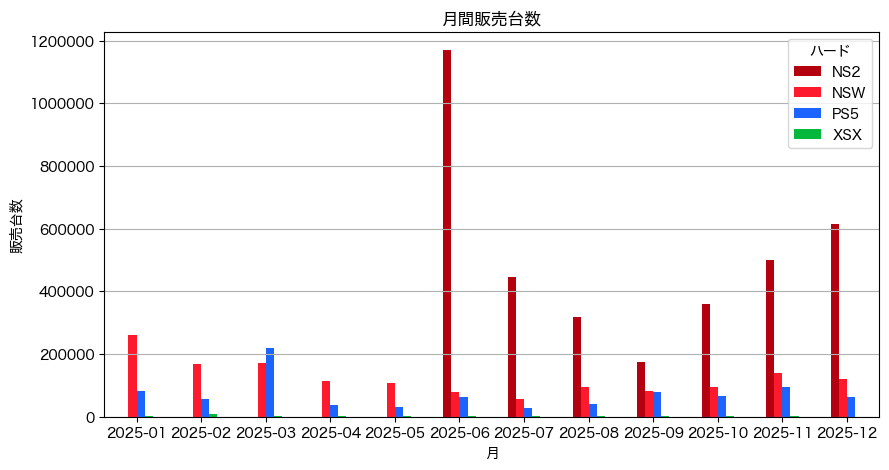

In [6]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=gu.report_begin(report_date), end=report_date,
                                        stacked=False)

12月のSwitch2が60万台を突破｡残り1週間で合計80万台に到達するでしょう｡
その場合､任天堂は10月､11月､12月の2025Q3に166万台を出荷したことになります｡


In [7]:
df = df.style.format({'NS2': '{:,.0f}', 'NSW': '{:,.0f}', 'PS5': '{:,.0f}', 'XSX': '{:,.0f}'})
display(df)

hw,NS2,NSW,PS5,XSX
year_month,,,,
2025-01,0,"260,447","81,587","3,861"
2025-02,0,"167,188","56,886","9,751"
2025-03,0,"171,921","218,300","2,081"
2025-04,0,"113,513","38,983","1,710"
2025-05,0,"106,506","32,001","3,467"
2025-06,"1,169,684","78,097","63,516","1,400"
2025-07,"444,706","57,532","28,959","1,197"
2025-08,"319,690","94,517","39,004","1,599"
2025-09,"175,542","82,946","78,693","1,121"


### Nintendo Switchの月間販売台数： 2023,2024年との比較

Switch2の大量出荷によりSwitch→Switch2への切り替えスピードが早まっています｡
12月の前年比は33%程度になりそうです｡


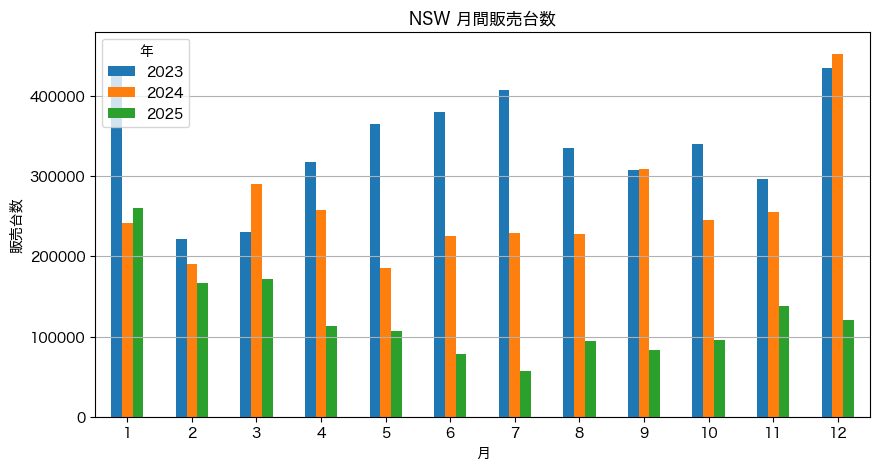

In [8]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

In [9]:
this_year = report_date.year
df = df.drop(columns=[2023])
df.loc[:, "YoY"] = df.loc[:,this_year] / df.loc[:, this_year - 1]
df.style.format({'YoY': '{:.1%}'})

year,2024,2025,YoY
month,,,
1,241282,260447,107.9%
2,190786,167188,87.6%
3,289673,171921,59.4%
4,257515,113513,44.1%
5,185821,106506,57.3%
6,225316,78097,34.7%
7,229316,57532,25.1%
8,227913,94517,41.5%
9,308404,82946,26.9%


### PlayStation 5の月間販売台数： 2023, 2024年との比較

PS5にクリスマスは訪れませんでした｡
セールの効果なく､12月は8万程度になりそうです｡9万台は無理なので11月を下回ります｡
昨年同月比はギリギリ50%いくかどうか｡

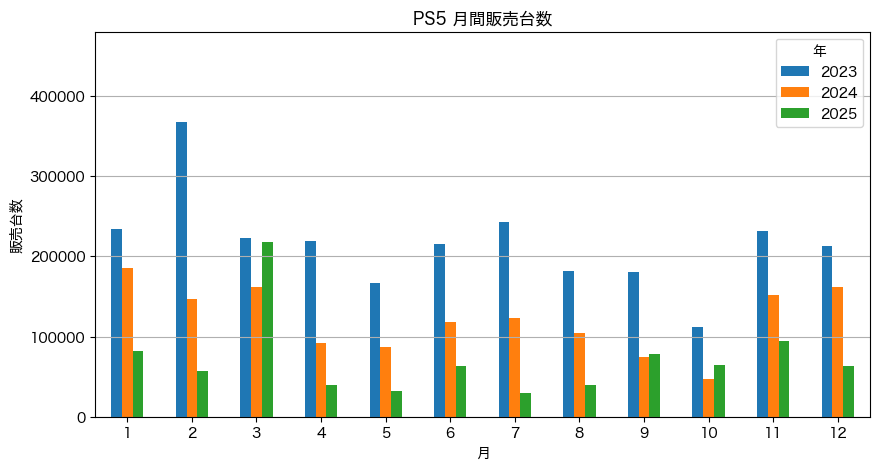

In [10]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

In [11]:
this_year = report_date.year
df = df.drop(columns=[2023])
df.loc[:, "YoY"] = df.loc[:,this_year] / df.loc[:, this_year - 1]
df.style.format({'YoY': '{:.1%}'})

year,2024,2025,YoY
month,,,
1,185480,81587,44.0%
2,146945,56886,38.7%
3,162281,218300,134.5%
4,91981,38983,42.4%
5,87218,32001,36.7%
6,117592,63516,54.0%
7,123087,28959,23.5%
8,104178,39004,37.4%
9,74523,78693,105.6%


## 累計販売推移



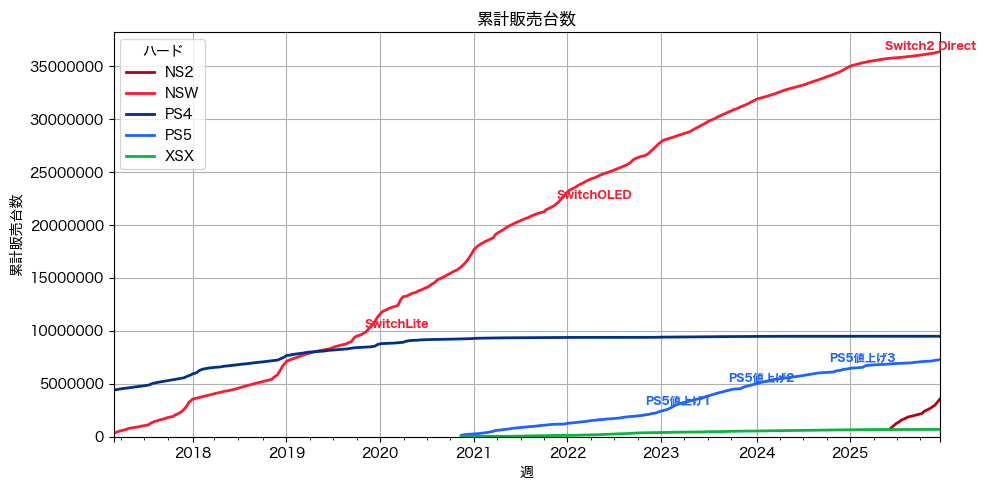

In [12]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = long_range_event_mask)

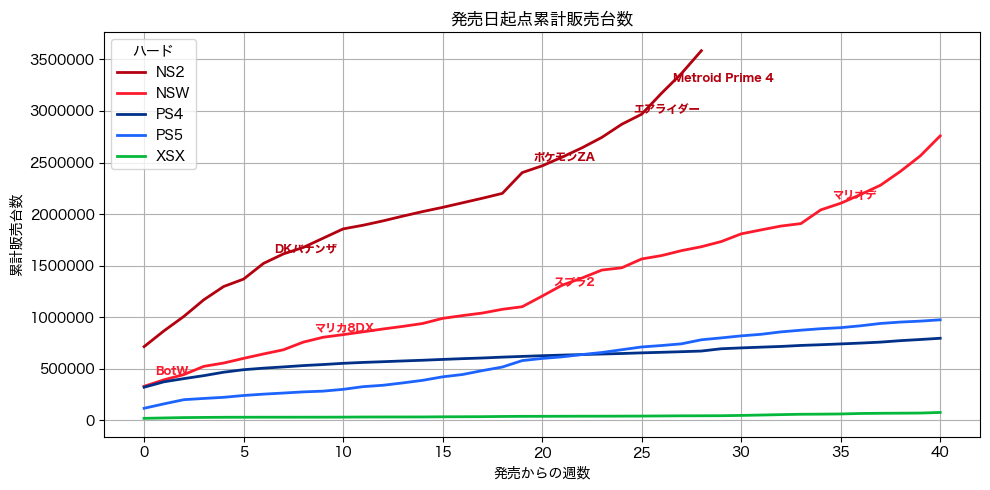

In [13]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], end=40, event_mask=report_event_mask)

### Switch2/PS5差分

Switch2の累計は358万台に到達｡次週には370万を超えるでしょう｡これはPS5の国内累計727万台の半分､363万台を超えます｡
Switch2は半年強でPS5累計の半分まで迫りました｡

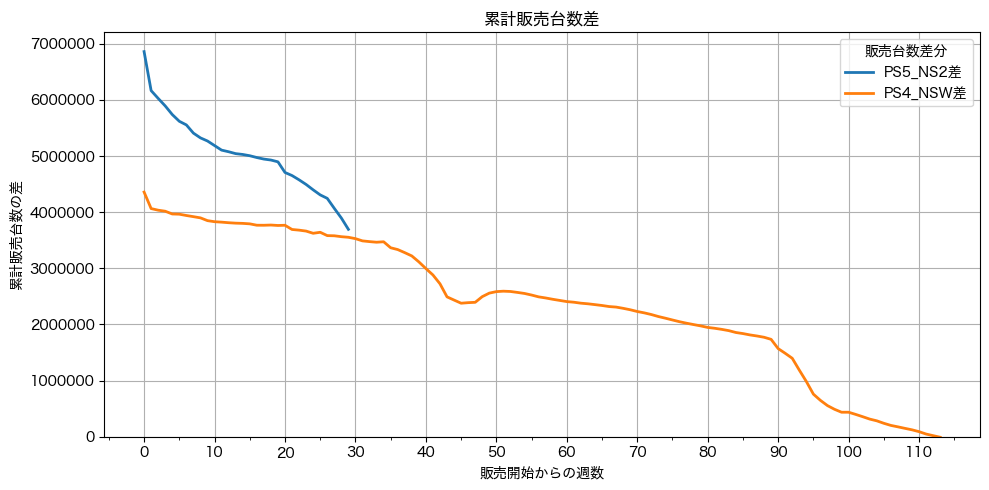

In [14]:
(fig4, d4) = ph.plot_cumsum_diffs(cmplist = [('NS2', 'PS5'), ('NSW', 'PS4')], xgrid=10)

In [15]:
# d4.head(35)

### PS5/PS4差分

PS4とPS5の推移差は日本版の値下げによっても縮まっていませんが､
これ以上差が広がるのを防ぐ効果はあったようです｡
ただ､年末年始を過ぎた後にどうなるかは分かりません｡


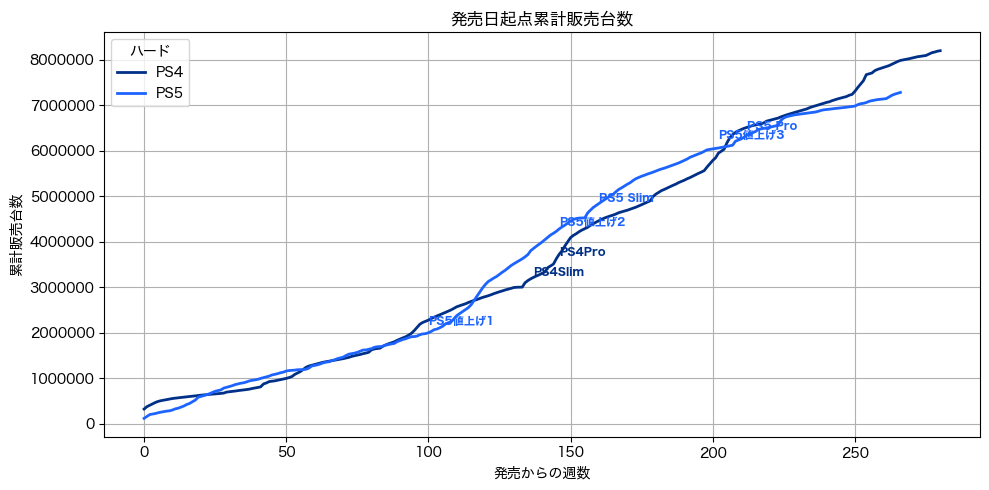

In [16]:
middle_range_event_mask = he.EventMasks(hard=1.5, soft=0, event=1, price=1, sale=0)
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], end=280, event_mask=middle_range_event_mask)


## Switch2初動状況

Switch2は今週も歴代初動1位の座をキープしています｡20万台出荷が続くうちは盤石の首位でしょう｡

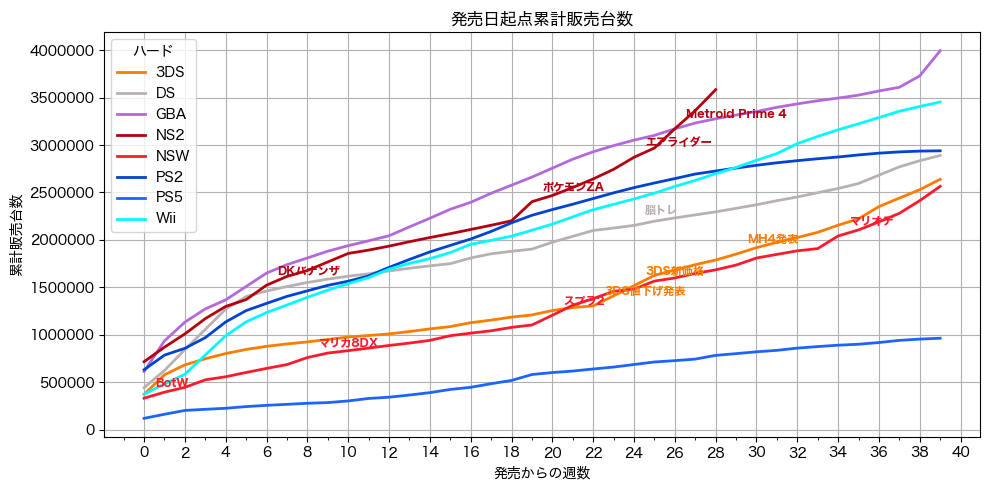

In [6]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=39,
                                        event_mask=report_event_mask)

In [7]:
df12 = df.iloc[df.index == 28]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)
display(df12_unpivot.style.format({'販売数': '{:,.0f}'}))

,週数,販売数
ハード,,
NS2,28,"3,583,810"
GBA,28,"3,276,989"
PS2,28,"2,725,751"
Wii,28,"2,697,766"
DS,28,"2,295,713"
3DS,28,"1,787,469"
NSW,28,"1,683,937"
PS5,28,"782,050"


## 年単位の状況

2025年の販売台数が596万台に達しました｡2025年は620万台で着地しそうです｡
2022年の626万台にはギリ届かないものの､2018,2019年を超える､景気の良い水準になりました｡

2017年､最初の年のSwitchは10ヶ月で340万台売りましたが､
Switch2は7ヶ月で約380万台販売できそうです｡

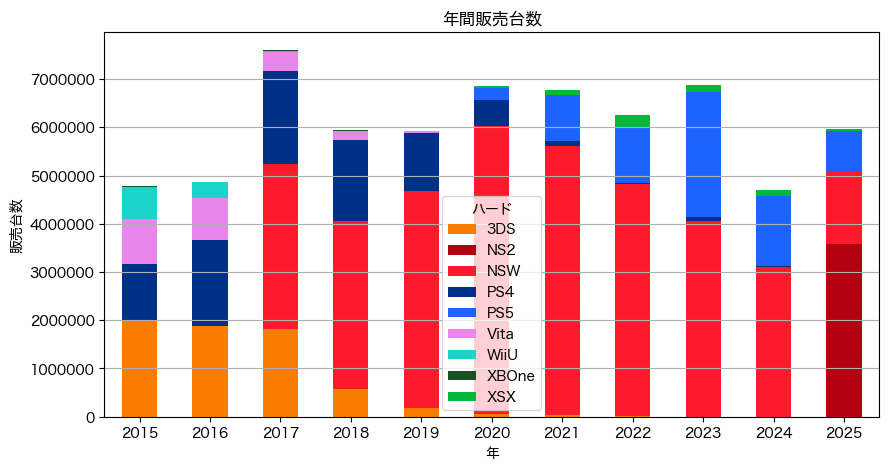

In [19]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=gu.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [20]:
# df["sum"] = df.sum(axis=1)
# df

### PS5の年間販売台数推移

集計期間はあと1週残っていますが､PS5については2025年は90万台に届かないと言い切っていいでしょう｡
100万台はもちろん､2021年の水準にも届かず､今年のPS5は急速な減少に見舞われた年でした｡

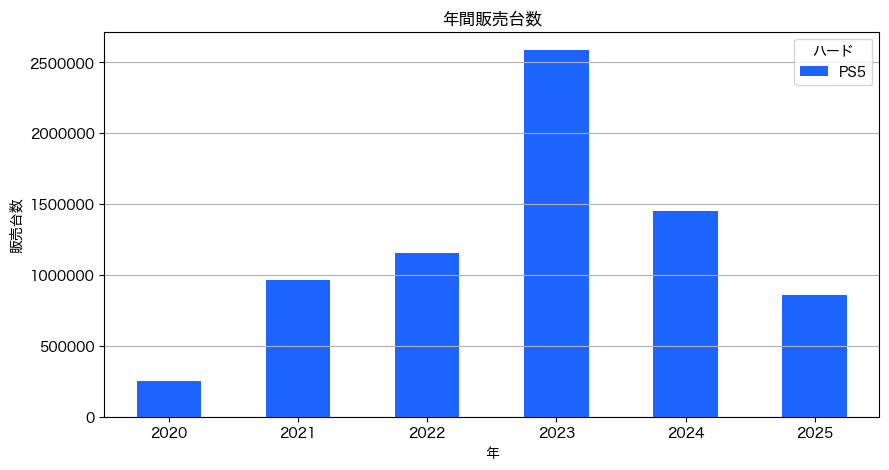

In [21]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS5'], 
                                       begin=gu.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [22]:
df

hw,PS5
year,
2020,255150
2021,968185
2022,1154054
2023,2587468
2024,1454149
2025,859972


### PS4, PS3の落ち込み方

PS3,PS4の末期の落ち込み方を見るとわかりますが､100万台を下回るのは非常に危険です｡
ここから先は急激な下り坂です｡

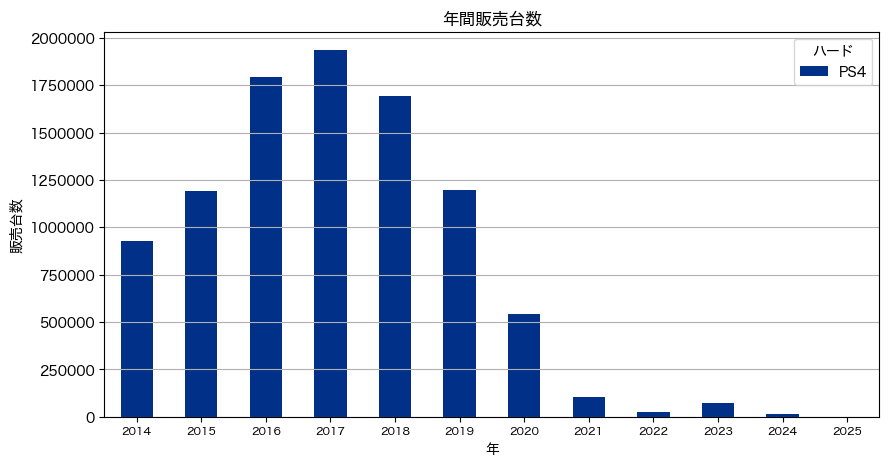

In [23]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4'], 
                                       begin=datetime(2005,1,1),
                                       stacked=True, 
                                       ticklabelsize=8)

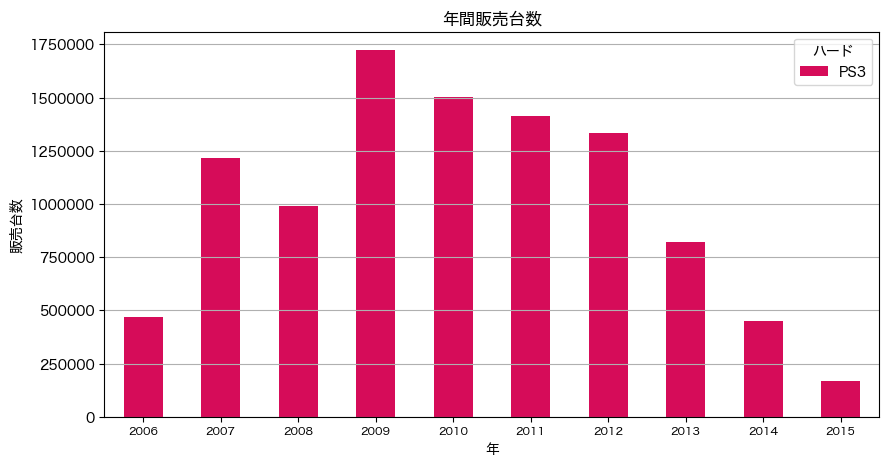

In [24]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS3'], 
                                       begin=datetime(2005,1,1),
                                       stacked=True, 
                                       ticklabelsize=8)

ただ､この下り坂には明確な理由がありまして､
PS3もPS4も急激な落ち込みは「次世代機」が見えているからこそ発生しています｡
PS4が100万台を切った年はPS5の発売年ですし､
PS3が100万台を切った年は翌年2月にPS4の発売を控えていました｡

一方､PS5は次世代機が2年以上先の状況で100万台を切った初めてのケースです｡
この場合に翌年がどうなるのか､従来の推移を単純に当て嵌めることは出来ません｡
我々は未知の領域にいます｡

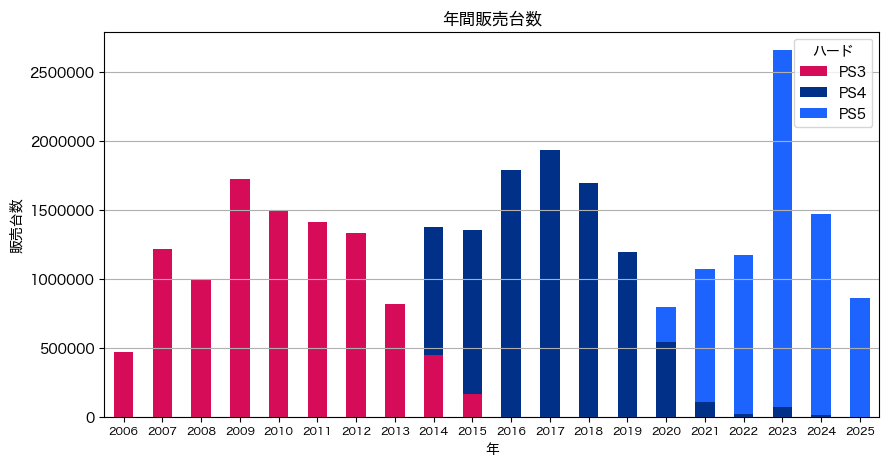

In [25]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS3', 'PS4', 'PS5'], 
                                       begin=datetime(2005,1,1),
                                       stacked=True, 
                                       ticklabelsize=8)

### 年単位のメーカーシェア

ここまで来たら数字変化しないだろうと思ってたら､任天堂のシェアが85%に達してしまいました｡


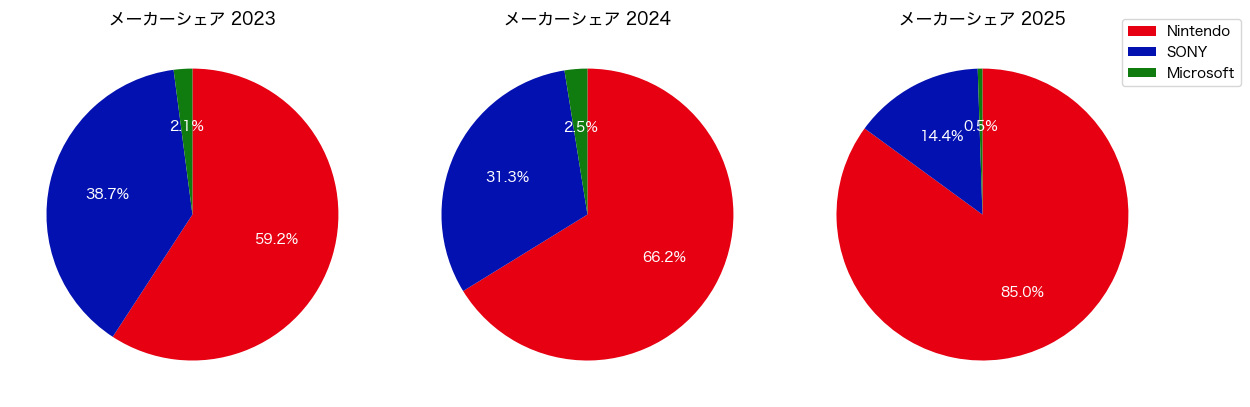

In [26]:
(fig, df) = ph.plot_maker_share_pie(begin_year=gu.years_ago(report_date, 2).year, end_year=report_date.year)


2020年の87.8%に次ぐ高さです｡

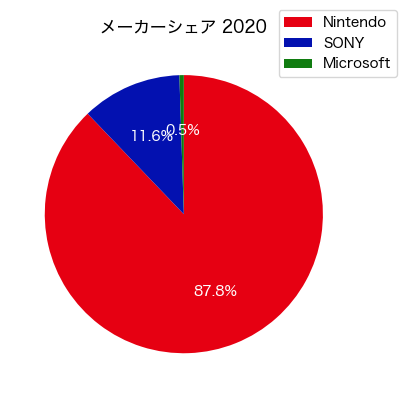

In [27]:
(fig, df) = ph.plot_maker_share_pie(begin_year=2020, end_year=2020)